In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from pathlib import Path

dd = Path().cwd().parent.parent / 'data'

# Location of the league building. 
league_cv = (-117.24060311836597, 32.94814917805023)

In [2]:
cd_mi = gpd.read_file(dd / "cd_mi.geojson", driver='GeoJSON')

/Users/eric/proj/league-projects/data/marketing-data/venv/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


In [3]:
#For contact information
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/cde.ca.gov-schools-2.1.1.csv')
public_schools_df = pkg.resource('public_schools').dataframe()


In [4]:
schools = gpd.read_file(dd / 'SCHOOL.zip').to_crs(cd_mi.crs)


schools.gsOffered.unique()

def parse_grade(grade):
    if grade is None:
        return (None, None)  # Handle None values explicitly if needed
    # Split grades by '-' and process each part
    parts = grade.split('-')
    min_grade = parse_single_grade(parts[0])
    max_grade = parse_single_grade(parts[-1])  # Handles cases like 'K-K'
    return (min_grade, max_grade)

def parse_single_grade(grade):
    if grade == 'K':
        return 0
    elif grade == 'Adult':
        return 16
    elif grade == 'P':
        return -1
    else:
        return int(grade)
    
schools[['minGrade', 'maxGrade']] = schools['gsOffered'].apply(lambda x: parse_grade(x)).apply(pd.Series)
schools.head()

,district,schoolID,priv,shrtName,gsOffered,socType,charter,openDate,zip,city,addr,name,cdsCode,docType,geometry,minGrade,maxGrade
0,Sweetwater Union High,1,N,Bonita Vista Mid,7-8,Intermediate/Middle Schools (Public),N,1980-07-01,91910,Chula Vista,650 Otay Lakes Road,Bonita Vista Middle,37684116059745,High School District,POINT (499434.996 3612336.785),7.0,8.0
1,Sweetwater Union High,2,N,Bonita Vista SH,9-12,High Schools (Public),N,1980-07-01,91913,Chula Vista,751 Otay Lakes Road,Bonita Vista Senior High,37684113730405,High School District,POINT (500170.197 3612042.562),9.0,12.0
2,Chula Vista Elementary,3,N,Clear View,K-6,Elementary Schools (Public),N,1991-09-10,91910,Chula Vista,455 Windrose Way,Clear View,37680236109771,Elementary School District,POINT (495826.109 3611954.475),0.0,6.0
3,Chula Vista Elementary,4,N,Tiffany,K-6,Elementary Schools (Public),N,1980-07-01,91913,Chula Vista,1691 Elmhurst Street,Tiffany (Burton C.) Elementary,37680236095020,Elementary School District,POINT (500876.855 3611994.581),0.0,6.0
4,Chula Vista Elementary,5,N,McMillin,K-6,Elementary Schools (Public),N,2001-07-17,91913,Chula Vista,1201 Santa Cora Avenue,McMillin (Corky) Elementary,37680236118988,Elementary School District,POINT (501487.35 3610622.843),0.0,6.0


<Axes: >

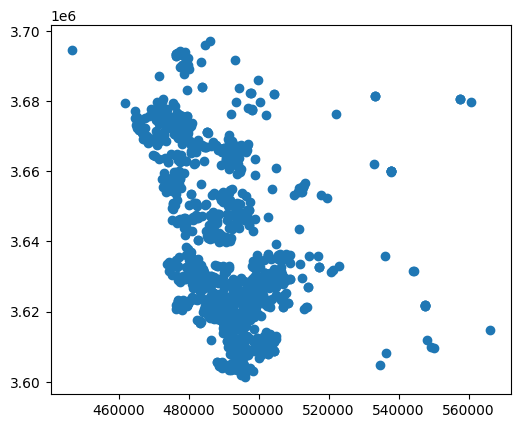

In [5]:
schools.plot()

In [6]:
schools.gsOffered.unique()

array(['7-8', '9-12', 'K-6', 'K-5', 'K-8', 'P-8', 'K-12', '7-12', '6-12',
       'P-6', '6-8', '1-5', 'K-4', '11-12', 'K-3', '3-5', '5-6', '7-9',
       '4-6', 'P-5', 'K-2', '10-12', 'P-12', 'P-K', 'K-1', '3-6', 'P',
       '4-8', '1-12', '5-8', 'Adult', '1-9', '1-6', 'K', '12', 'K-11',
       None, '9-Adult', '3-12', '9', '12-Adult', 'K-9', '8-12', '1-8',
       '3-9', 'K-K'], dtype=object)

In [7]:
#schools.gsOffered.unique() # How to get all of the grades

# Grade we are interested in. 
grades = ['7-8', '9-12', 'K-6', 'K-5', 'K-8', 'P-8', 'K-12', '7-12', '6-12',
       'P-6', '6-8', '11-12',  '5-6', '7-9', '4-6', '10-12', 
       '4-8', '1-12', '5-8',  '1-9',  '12', 'K-11', 
       '3-12', '9',  'K-9', '8-12', '1-8']

grades = ['7-8', '9-12',  'K-8', 'P-8', 'K-12', '7-12', '6-12',
       '6-8', '11-12',  '5-6', '7-9', '10-12', 
       '4-8', '1-12', '5-8',  '1-9',  '12', 'K-11', 
       '3-12', 'K-9', '8-12', '1-8']

#schools.socType.unique()
types = [
       'Intermediate/Middle Schools (Public)', 
       'High Schools (Public)',
       'Alternative Schools of Choice',
       'District Community Day Schools',
       'K-12 Schools (Public)',
       'Junior High Schools (Public)',
       'Private',
       'San Marcos Unified']

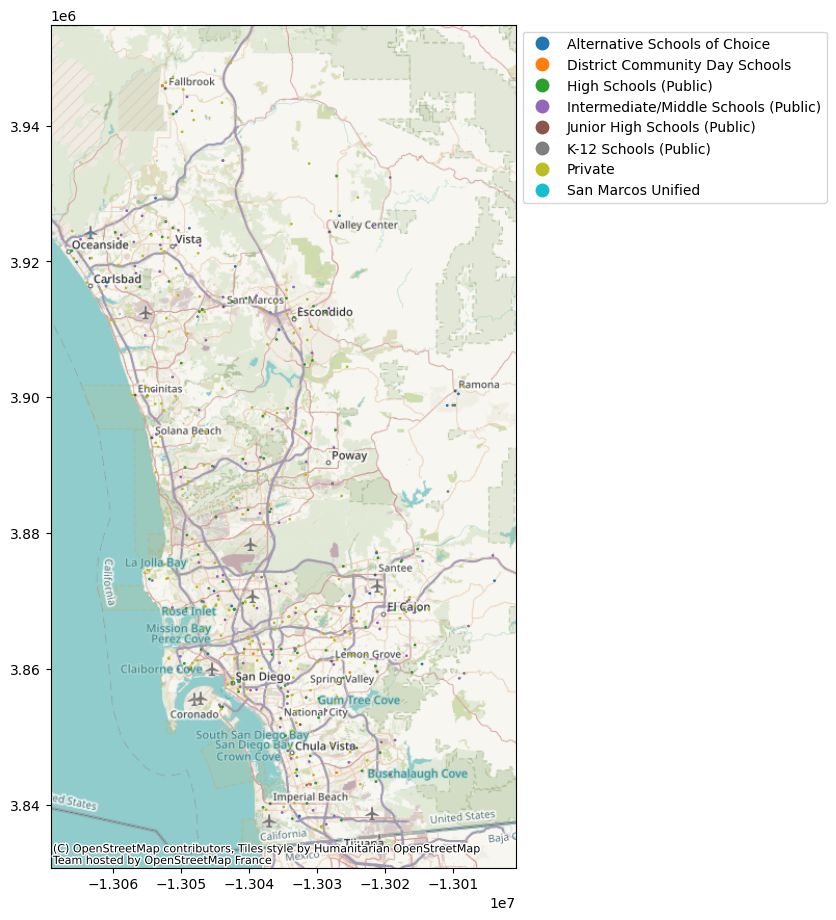

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6,15))  

t = schools.to_crs(epsg=3857) # Make it web mercator to match the basemap
t = t[t.gsOffered.isin(grades)]
t = t[t.socType.isin(types)]
t = t.cx[-1.307e7:-1.300e7, :]

t.plot(markersize=1, column='socType', legend=True, ax=ax)

cx.add_basemap(ax)
leg = ax.get_legend()                                                                         
leg.set_bbox_to_anchor((1, 1))                                                              
    
t.to_file(dd / "schools.geojson", driver='GeoJSON')

In [9]:
libr = gpd.read_file(dd / 'Library.zip')
libr.head()

,WEBSITE,ADDRESS,DISTRICT,NAME,TYPE,PHONE,ZIP,CITY,DATA_SRC,UPDATE_DAT,geometry
0,https://www.chulavistaca.gov/departments/library,365 F Street,Chula Vista,Civic Center Branch,Public,(619) 691-5069,91910,"Chula Vista, CA",Chula Vista,2023-07-25,POINT (6305123.54 1813996.9)
1,https://www.chulavistaca.gov/departments/library,389 Orange Avenue,Chula Vista,South Chula Vista Branch,Public,(619) 585-5755,91911,"Chula Vista, CA",Chula Vista,2023-07-25,POINT (6309570.94 1799657.16)
2,https://coronadolibrary.org/,640 Orange Avenue,Coronado,Coronado Public,Public,(619) 522-7390,92118,"Coronado, CA",City of Coronado website,2023-07-25,POINT (6276278.13 1832521.59)
3,https://www.escondido.org/library,239 South Kalmia Street,Escondido,Escondido Public,Public,(760) 839-4683,92025,"Escondido, CA",City of Escondido,2020-03-05,POINT (6307722.26 1988665.48)
4,https://www.nationalcityca.gov/government/library,1243 National City Blvd,National City,National City Public,Public,(619) 336-4241,91950,"National City, CA",National City Website,2023-07-25,POINT (6298815.066 1824885.622)


<Axes: >

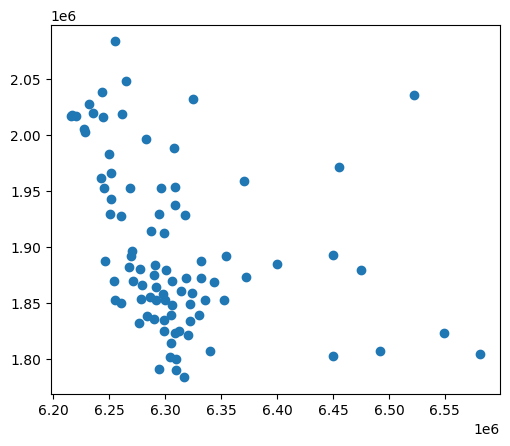

In [10]:
libr.plot()

In [17]:
# Get a POINT for the League CV classroom to calculate distances to other sites. 

from pyproj import Transformer
from shapely.geometry import Point

# Initialize transformer
# The direction is set to False, as it defaults to transforming from crs_from to crs_to
transformer = Transformer.from_crs("EPSG:4326", schools.crs, always_xy=True)

# Transform coordinates
p = transformer.transform(league_cv[0], league_cv[1])
p = Point(*p)

# Distance in meters from League classroom. 
schools['cv_dist'] = schools.geometry.distance(p)
schools['cv_miles'] = schools.cv_dist / 1600 # The CRS is in meters

# 2 mi buffer, for aggregating neighborhoods
schools['buffered'] = schools.geometry.buffer(2000)


In [19]:
# Perform a spatial join with the original schools GeoDataFrame
# This time, the left DataFrame will use the buffered geometries

t = gpd.sjoin(schools.set_geometry('buffered'), cd_mi, how="inner", predicate='intersects')


t = t.groupby('schoolID').agg({
    'name': 'first',  # Taking the first schoolID from the joined schools
    'district':'first',
    'priv':'first',
    'child_density': 'mean',   # Mean of 'child_density'
    'med_income': 'max',      # Mean of 'med_income'
    'cv_miles': 'min',
    'minGrade': 'min',
    'maxGrade': 'max',
    'geometry': 'first'
})

t = gpd.GeoDataFrame(t)
t = t.set_crs(schools.crs)  # <-- Set the CRS here


t['cd_pct'] = t['child_density'].rank(pct=True)

t['med_income'] = t.med_income.fillna(t.med_income.mean())
t['mi_pct'] = t['med_income'].rank(pct=True)

t['metric'] = t.mi_pct * t.cd_pct

t.to_file(dd / "target_schools.geojson", driver='GeoJSON')

t

,name,district,priv,child_density,med_income,cv_miles,minGrade,maxGrade,geometry,cd_pct,mi_pct,metric
schoolID,,,,,,,,,,,,
1,Bonita Vista Middle,Sweetwater Union High,N,0.000229,159861.0,24.880602,7.0,8.0,POINT (499434.996 3612336.785),0.601942,0.635437,0.382496
2,Bonita Vista Senior High,Sweetwater Union High,N,0.000321,159861.0,25.288731,9.0,12.0,POINT (500170.197 3612042.562),0.728155,0.635437,0.462697
3,Clear View,Chula Vista Elementary,N,0.000195,159861.0,23.922774,0.0,6.0,POINT (495826.109 3611954.475),0.511650,0.635437,0.325122
4,Tiffany (Burton C.) Elementary,Chula Vista Elementary,N,0.000338,159861.0,25.563298,0.0,6.0,POINT (500876.855 3611994.581),0.750485,0.635437,0.476886
5,McMillin (Corky) Elementary,Chula Vista Elementary,N,0.000410,154352.0,26.485527,0.0,6.0,POINT (501487.35 3610622.843),0.847087,0.561650,0.475767
...,...,...,...,...,...,...,...,...,...,...,...,...
100431,Arrow Academy,Valley Center-Pauma Unified,Y,0.000012,134771.0,23.671716,1.0,12.0,POINT (496997.24 3678041.7),0.056311,0.344660,0.019408
100432,Carmel Mountain Preschool,Poway Unified,Y,0.000223,203875.0,6.989698,0.0,0.0,POINT (488517.513 3647544.61),0.586893,0.848544,0.498005
100437,Discovery Isle,Poway Unified,Y,0.000172,250001.0,10.675891,0.0,0.0,POINT (494503.881 3643830.466),0.406796,0.967476,0.393565


In [ ]:
# Upper middle income, no too far, public
x = t[(t.mi_pct.between(.7, .9)) & (t.cv_miles < 40) & (t.priv == 'N')]
print(len(x))
x[['name','district','priv','med_income','mi_pct','cd_pct', 'cv_miles']].head(20)

153


,name,district,priv,med_income,mi_pct,cd_pct,cv_miles
schoolID,,,,,,,
6,Silver Strand Elementary,Coronado Unified,N,194625.0,0.793689,0.078641,21.767203
15,Chula Vista Hills Elementary,Chula Vista Elementary,N,197565.0,0.825243,0.739806,25.633004
19,Heritage Elementary,Chula Vista Elementary,N,197565.0,0.825243,0.838835,26.490248
20,Rancho del Rey Middle,Sweetwater Union High,N,197565.0,0.825243,0.765049,25.891674
21,Otay Ranch Senior High,Sweetwater Union High,N,197565.0,0.825243,0.878641,26.989555
22,Casillas (Joseph) Elementary,Chula Vista Elementary,N,197565.0,0.825243,0.702913,25.873040
23,Hedenkamp (Anne and William) Elementary,Chula Vista Elementary,N,197565.0,0.825243,0.740777,26.485594
27,Rogers (Greg) Elementary,Chula Vista Elementary,N,197565.0,0.825243,0.713592,25.587717
46,Walker Elementary,San Diego Unified,N,187686.0,0.760194,0.604854,7.129990


In [ ]:
# Low child density
x = t[(t.cd_pct < .4)]
x[['name','district','priv','med_income','mi_pct','cd_pct', 'cv_miles']].head(20)

,name,district,priv,med_income,mi_pct,cd_pct,cv_miles
schoolID,,,,,,,
6,Silver Strand Elementary,Coronado Unified,N,194625.000000,0.793689,0.078641,21.767203
9,Campo Elementary,Mountain Empire Unified,N,105319.178817,0.083981,0.027184,48.926144
11,Eastlake Middle,Sweetwater Union High,N,177000.000000,0.694175,0.389320,26.600270
25,Hillside Junior/Senior High,Mountain Empire Unified,N,105319.178817,0.083981,0.019903,46.194315
26,Campo High (Continuation),Mountain Empire Unified,N,105319.178817,0.083981,0.019903,46.194315
28,Torrey Pines Elementary,San Diego Unified,N,248125.000000,0.932524,0.246602,6.169382
29,Preuss School UCSD,San Diego Unified,N,248125.000000,0.932524,0.299029,4.662166
30,Blossom Valley Elementary,Cajon Valley Union,N,111250.000000,0.135437,0.076699,23.833521
31,Lindo Park Elementary,Lakeside Union Elementary,N,141125.000000,0.430583,0.226699,20.058141


In [27]:
schools[['name','cdsCode'] ] 

,name,cdsCode
0,Bonita Vista Middle,37684116059745
1,Bonita Vista Senior High,37684113730405
2,Clear View,37680236109771
3,Tiffany (Burton C.) Elementary,37680236095020
4,McMillin (Corky) Elementary,37680236118988
...,...,...
1025,Poway to Palomar Middle College High,37682960141390
1026,Discovery Isle,37682967097298
1027,"TERI, INC. The Country School",37737916927644
1028,Bright Horizon Academy,37683387080427
